# Circuiti 2

In [1]:
import numpy as np
from iminuit import Minuit
from iminuit.cost import LeastSquares
from scipy.stats import chi2
import matplotlib.pyplot as plt
from uncertainties import ufloat
import uncertainties.umath as uu

### Resistenza generatore di funzioni

In [2]:
R = 267 #resistenza

V_R = 4.189
V = 5

R_gen = (V - V_R)/V_R * R
print(R_gen)

51.69181188827882


### Circuito RC

In [3]:
R = ufloat(67 * 10 ** (3), 67 * 10) #ohm
C = 10 * 10 ** (-9) #farad

#### Carica

In [4]:
freq = 200 #hertz
tens = 5 #volt

In [5]:
data = np.loadtxt("Dati/RC_carica.txt")

t = []
V = []

for i in range(1,len(data)):
    t.append(data[i][0] * 10 ** (-6))
    V.append(data[i][1] * 10 ** (-3))

t = np.array(t)
V = np.array(V)

In [6]:
def model(t, V0, tau, t0): # t0 l'offset
    return V0 * (1 - np.exp(-(t + t0)/tau))

V_err = 0.01 * V

minimi_quadrati = LeastSquares(t, V, V_err, model)

m = Minuit(minimi_quadrati, V0 = 5, tau = 0.001, t0 = 0)

m.fixed["V0"] = (5)
m.migrad()
m.fixed = False
m.migrad()
m.hesse()
display(m)

tau1 = m.values["tau"]
tau1_err = m.errors["tau"]

def func(x):
    return chi2.cdf(x,m.ndof)

pvalue = func(np.inf) - func(m.fval)
print("p value: " + str(pvalue))

┌─────────────────────────────────────────────────────────────────────────┐
│                                Migrad                                   │
├──────────────────────────────────┬──────────────────────────────────────┤
│ FCN = 1.159 (χ²/ndof = 0.1)      │              Nfcn = 149              │
│ EDM = 3.81e-07 (Goal: 0.0002)    │                                      │
├──────────────────────────────────┼──────────────────────────────────────┤
│          Valid Minimum           │   Below EDM threshold (goal x 10)    │
├──────────────────────────────────┼──────────────────────────────────────┤
│      No parameters at limit      │           Below call limit           │
├──────────────────────────────────┼──────────────────────────────────────┤
│             Hesse ok             │         Covariance accurate          │
└──────────────────────────────────┴──────────────────────────────────────┘
┌───┬──────┬───────────┬───────────┬────────────┬────────────┬─────────┬─────────┬───────┐
│   │ Name │   Value   │ Hesse Err │ Minos Err- │ Minos Err+ │ Limit-  │ Limit+  │ Fixed │
├───┼──────┼───────────┼───────────┼────────────┼────────────┼─────────┼─────────┼───────┤
│ 0 │ V0   │   5.019   │   0.034   │            │            │         │         │       │
│ 1 │ tau  │ 0.648e-3  │ 0.012e-3  │            │            │         │         │       │
│ 2 │ t0   │  13.6e-6  │  3.3e-6   │            │            │         │         │       │
└───┴──────┴───────────┴───────────┴────────────┴────────────┴─────────┴─────────┴───────┘
┌─────┬───────────────────────────────┐
│     │        V0       tau        t0 │
├─────┼───────────────────────────────┤
│  V0 │   0.00112 355.35e-9 60.553e-9 │
│ tau │ 355.35e-9  1.48e-10  0.033e-9 │
│  t0 │ 60.553e-9  0.033e-9  1.07e-11 │
└─────┴───────────────────────────────┘

p value: 0.9999678363000635


[-0.04720712  0.09634802  0.16607881 -0.23609833  0.10059139 -0.55797664
  0.12619637  0.63224626 -0.14816127 -0.01944082  0.09620833 -0.49134661
  0.2179155   0.08323836 -0.00907522]


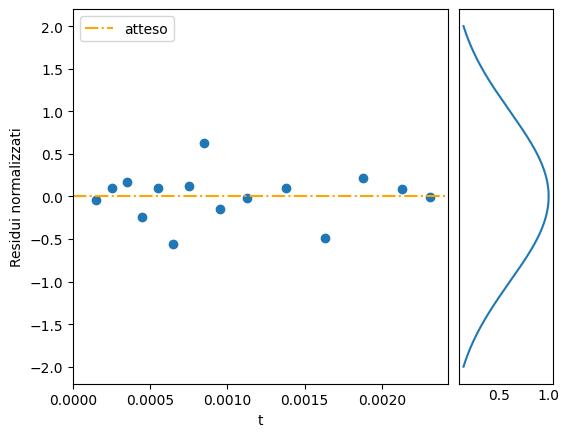

In [7]:
def mostra_residui(t, V, Verr, model, V0, tau, t0):
    residuals = (V - model(t,V0,tau,t0))/Verr

    fig = plt.figure(figsize=(6, 6))

    gs = fig.add_gridspec(2, 2,  width_ratios=(4, 1), height_ratios=(1, 4),
                        left=0.1, right=0.9, bottom=0.1, top=0.9,
                        wspace=0.05, hspace=0.05)

    ax = fig.add_subplot(gs[1, 0])
    ax_ploty = fig.add_subplot(gs[1, 1], sharey=ax)

    # weigthed mean of residuals

    ax.scatter(t, residuals)
    ax.hlines(0,0,len(V),color='orange',linestyle='-.',label='atteso')
    ax.set_xlabel("t")
    ax.set_xlim(0, max(t) * 1.05)
    ax.set_ylabel("Residui normalizzati")
    ax.legend(loc='upper left')
    ax.plot()

    x = np.linspace(-2, 2, 1000)
    ax_ploty.plot(np.exp(-0.5*(x)**2), x)
    ax_ploty.tick_params(labelleft=False, length=0)

    print(residuals)

mostra_residui(t, V, V_err, model, m.values["V0"], m.values["tau"], m.values["t0"])

#### Scarica

In [8]:
data = np.loadtxt("Dati/RC_scarica.txt")

t = []
V = []

for i in range(len(data)):
    t.append(data[i][0])
    V.append(data[i][1])

t = np.array(t)
V = np.array(V)

In [9]:
def model(t, V0, tau, t0, q): # t0 l'offset
    return V0 * np.exp(-(t + t0)/tau) + q

V_err = 0.03 * V

minimi_quadrati = LeastSquares(t, V, V_err, model)

m = Minuit(minimi_quadrati, V0 = 5, tau = 0.001, t0 = 0, q=0)

m.fixed["V0"] = (5)
m.migrad()
m.fixed = False
m.migrad()
m.hesse()
display(m)

tau2 = m.values["tau"]
tau2_err = m.errors["tau"]

def func(x):
    return chi2.cdf(x,m.ndof)

pvalue = func(np.inf) - func(m.fval)
print("p value: " + str(pvalue))
print(m.valid)

┌─────────────────────────────────────────────────────────────────────────┐
│                                Migrad                                   │
├──────────────────────────────────┬──────────────────────────────────────┤
│ FCN = 16.83 (χ²/ndof = 1.7)      │              Nfcn = 226              │
│ EDM = 2.48e-05 (Goal: 0.0002)    │                                      │
├──────────────────────────────────┼──────────────────────────────────────┤
│          Valid Minimum           │   Below EDM threshold (goal x 10)    │
├──────────────────────────────────┼──────────────────────────────────────┤
│      No parameters at limit      │           Below call limit           │
├──────────────────────────────────┼──────────────────────────────────────┤
│             Hesse ok             │     Covariance FORCED pos. def.      │
└──────────────────────────────────┴──────────────────────────────────────┘
┌───┬──────┬───────────┬───────────┬────────────┬────────────┬─────────┬─────────┬───────┐
│   │ Name │   Value   │ Hesse Err │ Minos Err- │ Minos Err+ │ Limit-  │ Limit+  │ Fixed │
├───┼──────┼───────────┼───────────┼────────────┼────────────┼─────────┼─────────┼───────┤
│ 0 │ V0   │    5.0    │    0.4    │            │            │         │         │       │
│ 1 │ tau  │ 0.671e-3  │ 0.012e-3  │            │            │         │         │       │
│ 2 │ t0   │ -2.48e-3  │  0.06e-3  │            │            │         │         │       │
│ 3 │ q    │  -0.063   │   0.010   │            │            │         │         │       │
└───┴──────┴───────────┴───────────┴────────────┴────────────┴─────────┴─────────┴───────┘
┌─────┬─────────────────────────────────────────────┐
│     │         V0        tau         t0          q │
├─────┼─────────────────────────────────────────────┤
│  V0 │      0.178 -447.25e-9 23.3761e-6    0.27e-3 │
│ tau │ -447.25e-9   1.45e-10    0.06e-9 -112.62e-9 │
│  t0 │ 23.3761e-6    0.06e-9   3.21e-09   -35.3e-9 │
│   q │    0.27e-3 -112.62e-9   -35.3e-9   0.000104 │
└─────┴─────────────────────────────────────────────┘

p value: 0.07815844249569504
True


[ 0.77932129  0.56278818 -0.25603421 -0.65053007 -1.06258343 -0.74059191
 -0.50709859  3.54863394 -0.31281232 -0.58138511  0.15356531 -0.10844151
 -0.59058266  0.26826921]


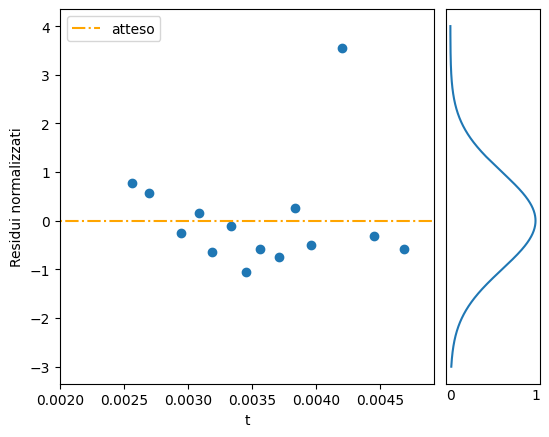

In [10]:
def mostra_residui(t, V, Verr, model, V0, tau, t0,q):
    residuals = (V - model(t,V0,tau,t0,q))/Verr

    fig = plt.figure(figsize=(6, 6))

    gs = fig.add_gridspec(2, 2,  width_ratios=(4, 1), height_ratios=(1, 4),
                        left=0.1, right=0.9, bottom=0.1, top=0.9,
                        wspace=0.05, hspace=0.05)

    ax = fig.add_subplot(gs[1, 0])
    ax_ploty = fig.add_subplot(gs[1, 1], sharey=ax)

    # weigthed mean of residuals

    ax.scatter(t, residuals)
    ax.hlines(0,0,len(V),color='orange',linestyle='-.',label='atteso')
    ax.set_xlabel("t")
    ax.set_xlim(0.002, max(t) * 1.05)
    ax.set_ylabel("Residui normalizzati")
    ax.legend(loc='upper left')
    ax.plot()

    x = np.linspace(-3, 4, 1000)
    ax_ploty.plot(np.exp(-0.5*(x)**2), x)
    ax_ploty.tick_params(labelleft=False, length=0)

    print(residuals)

mostra_residui(t, V, V_err, model, m.values["V0"], m.values["tau"], m.values["t0"],m.values["q"])

#### Studio tau

In [11]:
t = (tau1 - tau2) / np.sqrt(tau1_err ** 2 + tau2_err ** 2)
print(t)

-1.3573578462316471


In [12]:
C = ufloat(tau1, tau1_err) / R
print(C)

(9.67+/-0.21)e-09


#### Circuito RL

In [13]:
R = ufloat(466.3, 466.3 * 0.01)  #ohm

#### Carica

In [14]:
data = np.loadtxt("Dati/RL_carica.txt")

t = []
V = []

for i in range(len(data)):
    t.append(data[i][0] * 10 ** (-6))
    V.append(data[i][1])

t = np.array(t)
V = np.array(V)

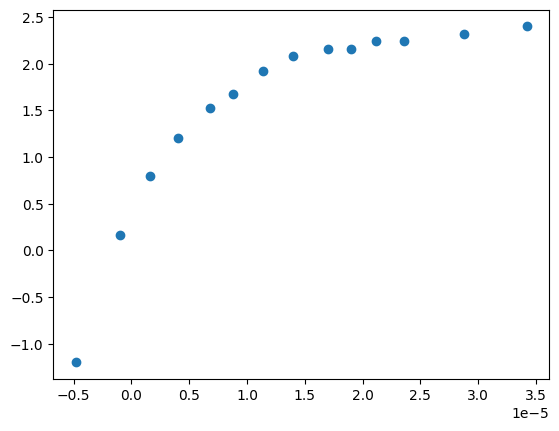

In [15]:
fig,ax = plt.subplots(1,1)
plt.scatter(t,V)
plt.show()

In [16]:
def model(t, V0, tau, t0, q): # t0 l'offset
    return V0 * (1 - np.exp(-(t + t0)/tau)) + q

V_err = 0.012 * V

minimi_quadrati = LeastSquares(t, V, V_err, model)

m = Minuit(minimi_quadrati, V0 = 5, tau = 0.001, t0 = 0, q = 0)

m.fixed["V0"] = (5)
m.fixed["q"] = (-2.5)
m.migrad()
m.fixed = False
m.migrad()
m.hesse()
display(m)

tau1 = m.values["tau"]
tau1_err = m.errors["tau"]

def func(x):
    return chi2.cdf(x,m.ndof)

pvalue = func(np.inf) - func(m.fval)
print("p value: " + str(pvalue))

┌─────────────────────────────────────────────────────────────────────────┐
│                                Migrad                                   │
├──────────────────────────────────┬──────────────────────────────────────┤
│ FCN = 23.13 (χ²/ndof = 2.3)      │              Nfcn = 292              │
│ EDM = 4.33e-05 (Goal: 0.0002)    │                                      │
├──────────────────────────────────┼──────────────────────────────────────┤
│          Valid Minimum           │   Below EDM threshold (goal x 10)    │
├──────────────────────────────────┼──────────────────────────────────────┤
│      No parameters at limit      │           Below call limit           │
├──────────────────────────────────┼──────────────────────────────────────┤
│             Hesse ok             │     Covariance FORCED pos. def.      │
└──────────────────────────────────┴──────────────────────────────────────┘
┌───┬──────┬───────────┬───────────┬────────────┬────────────┬─────────┬─────────┬───────┐
│   │ Name │   Value   │ Hesse Err │ Minos Err- │ Minos Err+ │ Limit-  │ Limit+  │ Fixed │
├───┼──────┼───────────┼───────────┼────────────┼────────────┼─────────┼─────────┼───────┤
│ 0 │ V0   │   2.581   │   0.026   │            │            │         │         │       │
│ 1 │ tau  │  7.92e-6  │  0.08e-6  │            │            │         │         │       │
│ 2 │ t0   │  2.22e-6  │  0.07e-6  │            │            │         │         │       │
│ 3 │ q    │  -0.209   │   0.024   │            │            │         │         │       │
└───┴──────┴───────────┴───────────┴────────────┴────────────┴─────────┴─────────┴───────┘
┌─────┬─────────────────────────────────────────────────────┐
│     │           V0          tau           t0            q │
├─────┼─────────────────────────────────────────────────────┤
│  V0 │     0.000693  665.220e-12  1.686169e-9      -0.5e-3 │
│ tau │  665.220e-12     6.04e-15        0e-15   93.517e-12 │
│  t0 │  1.686169e-9        0e-15     5.24e-15 -1.688555e-9 │
│   q │      -0.5e-3   93.517e-12 -1.688555e-9     0.000555 │
└─────┴─────────────────────────────────────────────────────┘

p value: 0.010262285243226033


[-0.08138534 -0.24251032  2.15606037  0.30302563 -1.42114271 -2.4924726
  0.44234408  1.63774883  0.61525338 -1.34654317  0.08059219 -1.22342021
 -0.01996871  1.87694384]


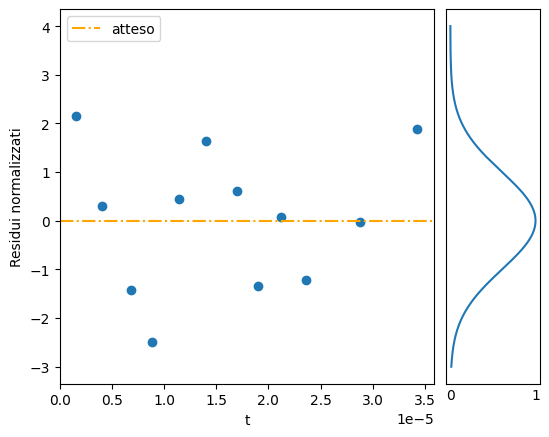

In [17]:
def mostra_residui(t, V, Verr, model, V0, tau, t0, q):
    residuals = (V - model(t,V0,tau,t0,q))/Verr

    fig = plt.figure(figsize=(6, 6))

    gs = fig.add_gridspec(2, 2,  width_ratios=(4, 1), height_ratios=(1, 4),
                        left=0.1, right=0.9, bottom=0.1, top=0.9,
                        wspace=0.05, hspace=0.05)

    ax = fig.add_subplot(gs[1, 0])
    ax_ploty = fig.add_subplot(gs[1, 1], sharey=ax)

    # weigthed mean of residuals

    ax.scatter(t, residuals)
    ax.hlines(0,0,len(V),color='orange',linestyle='-.',label='atteso')
    ax.set_xlabel("t")
    ax.set_xlim(0, max(t) * 1.05)
    ax.set_ylabel("Residui normalizzati")
    ax.legend(loc='upper left')
    ax.plot()

    x = np.linspace(-3, 4, 1000)
    ax_ploty.plot(np.exp(-0.5*(x)**2), x)
    ax_ploty.tick_params(labelleft=False, length=0)

    print(residuals)

mostra_residui(t, V, V_err, model, m.values["V0"], m.values["tau"], m.values["t0"], m.values["q"])

#### Scarica

In [18]:
data = np.loadtxt("Dati/RL_scarica.txt")

t = []
V = []

for i in range(len(data)):
    t.append(data[i][0] * 10 ** (-5))
    V.append(data[i][1])

t = np.array(t)
V = np.array(V)

In [19]:
def model(t, V0, tau, t0, q): # t0 l'offset
    return V0 * np.exp(-(t + t0)/tau) + q

V_err = 0.05 * V

minimi_quadrati = LeastSquares(t, V, V_err, model)

m = Minuit(minimi_quadrati, V0 = 5, tau = 0.001, t0 = 0, q = 0)

m.fixed["V0"] = (5)
m.fixed["q"] = (-2.5)
m.migrad()
m.fixed = False
m.migrad()
m.hesse()
display(m)

tau2 = m.values["tau"]
tau2_err = m.errors["tau"]

def func(x):
    return chi2.cdf(x,m.ndof)

pvalue = func(np.inf) - func(m.fval)
print("p value: " + str(pvalue))

┌─────────────────────────────────────────────────────────────────────────┐
│                                Migrad                                   │
├──────────────────────────────────┬──────────────────────────────────────┤
│ FCN = 12.89 (χ²/ndof = 1.4)      │              Nfcn = 434              │
│ EDM = 0.000118 (Goal: 0.0002)    │                                      │
├──────────────────────────────────┼──────────────────────────────────────┤
│          Valid Minimum           │   Below EDM threshold (goal x 10)    │
├──────────────────────────────────┼──────────────────────────────────────┤
│      No parameters at limit      │           Below call limit           │
├──────────────────────────────────┼──────────────────────────────────────┤
│             Hesse ok             │     Covariance FORCED pos. def.      │
└──────────────────────────────────┴──────────────────────────────────────┘
┌───┬──────┬───────────┬───────────┬────────────┬────────────┬─────────┬─────────┬───────┐
│   │ Name │   Value   │ Hesse Err │ Minos Err- │ Minos Err+ │ Limit-  │ Limit+  │ Fixed │
├───┼──────┼───────────┼───────────┼────────────┼────────────┼─────────┼─────────┼───────┤
│ 0 │ V0   │   11.16   │   0.22    │            │            │         │         │       │
│ 1 │ tau  │  8.61e-6  │  0.12e-6  │            │            │         │         │       │
│ 2 │ t0   │ -28.79e-6 │  0.17e-6  │            │            │         │         │       │
│ 3 │ q    │  -2.441   │   0.032   │            │            │         │         │       │
└───┴──────┴───────────┴───────────┴────────────┴────────────┴─────────┴─────────┴───────┘
┌─────┬─────────────────────────────────────────────────────┐
│     │           V0          tau           t0            q │
├─────┼─────────────────────────────────────────────────────┤
│  V0 │       0.0498 -9.667670e-9 21.479518e-9      -0.0007 │
│ tau │ -9.667670e-9     1.37e-14    0.007e-12 -1.613608e-9 │
│  t0 │ 21.479518e-9    0.007e-12     2.95e-14  559.358e-12 │
│   q │      -0.0007 -1.613608e-9  559.358e-12      0.00103 │
└─────┴─────────────────────────────────────────────────────┘

p value: 0.16746251750768026


[-1.88609783  0.3829469   2.74270407  1.00072613 -0.02500038 -0.11325691
 -0.37360567 -0.0522117  -0.53721229 -0.16727905 -0.42619867  0.10861907
 -0.01750375]


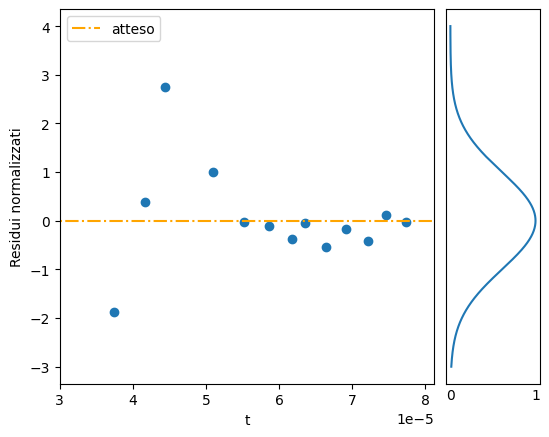

In [20]:
def mostra_residui(t, V, Verr, model, V0, tau, t0, q):
    residuals = (V - model(t,V0,tau,t0,q))/Verr

    fig = plt.figure(figsize=(6, 6))

    gs = fig.add_gridspec(2, 2,  width_ratios=(4, 1), height_ratios=(1, 4),
                        left=0.1, right=0.9, bottom=0.1, top=0.9,
                        wspace=0.05, hspace=0.05)

    ax = fig.add_subplot(gs[1, 0])
    ax_ploty = fig.add_subplot(gs[1, 1], sharey=ax)

    # weigthed mean of residuals

    ax.scatter(t, residuals)
    ax.hlines(0,0,len(V),color='orange',linestyle='-.',label='atteso')
    ax.set_xlabel("t")
    ax.set_xlim(3 * 10 ** (-5), max(t) * 1.05)
    ax.set_ylabel("Residui normalizzati")
    ax.legend(loc='upper left')
    ax.plot()

    x = np.linspace(-3, 4, 1000)
    ax_ploty.plot(np.exp(-0.5*(x)**2), x)
    ax_ploty.tick_params(labelleft=False, length=0)

    print(residuals)

mostra_residui(t, V, V_err, model, m.values["V0"], m.values["tau"], m.values["t0"], m.values["q"])

In [21]:
t = np.delete(t,(0,2))
V = np.delete(V,(0,2))

In [22]:
def model(t, V0, tau, t0, q): # t0 l'offset
    return V0 * np.exp(-(t + t0)/tau) + q

V_err = 0.04 * V

minimi_quadrati = LeastSquares(t, V, V_err, model)

m = Minuit(minimi_quadrati, V0 = 5, tau = 0.001, t0 = 0, q = 0)

m.fixed["V0"] = (5)
m.fixed["q"] = (-2.5)
m.migrad()
m.fixed = False
m.migrad()
m.hesse()
display(m)

tau2 = m.values["tau"]
tau2_err = m.errors["tau"]

def func(x):
    return chi2.cdf(x,m.ndof)

pvalue = func(np.inf) - func(m.fval)
print("p value: " + str(pvalue))

┌─────────────────────────────────────────────────────────────────────────┐
│                                Migrad                                   │
├──────────────────────────────────┬──────────────────────────────────────┤
│ FCN = 1.452 (χ²/ndof = 0.2)      │              Nfcn = 524              │
│ EDM = 3.5e-05 (Goal: 0.0002)     │                                      │
├──────────────────────────────────┼──────────────────────────────────────┤
│          Valid Minimum           │   Below EDM threshold (goal x 10)    │
├──────────────────────────────────┼──────────────────────────────────────┤
│      No parameters at limit      │           Below call limit           │
├──────────────────────────────────┼──────────────────────────────────────┤
│             Hesse ok             │         Covariance accurate          │
└──────────────────────────────────┴──────────────────────────────────────┘
┌───┬──────┬───────────┬───────────┬────────────┬────────────┬─────────┬─────────┬───────┐
│   │ Name │   Value   │ Hesse Err │ Minos Err- │ Minos Err+ │ Limit-  │ Limit+  │ Fixed │
├───┼──────┼───────────┼───────────┼────────────┼────────────┼─────────┼─────────┼───────┤
│ 0 │ V0   │    60     │    40     │            │            │         │         │       │
│ 1 │ tau  │  7.9e-6   │  0.7e-6   │            │            │         │         │       │
│ 2 │ t0   │  -16e-6   │   5e-6    │            │            │         │         │       │
│ 3 │ q    │   -2.39   │   0.05    │            │            │         │         │       │
└───┴──────┴───────────┴───────────┴────────────┴────────────┴─────────┴─────────┴───────┘
┌─────┬─────────────────────────────────────────────────────────┐
│     │            V0           tau            t0             q │
├─────┼─────────────────────────────────────────────────────────┤
│  V0 │      1.53e+03 -5.7352776e-6 174.862173e-6        0.3579 │
│ tau │ -5.7352776e-6      5.02e-13       0.8e-12   -31.7824e-9 │
│  t0 │ 174.862173e-6       0.8e-12      2.44e-11    -48.476e-9 │
│   q │        0.3579   -31.7824e-9    -48.476e-9       0.00292 │
└─────┴─────────────────────────────────────────────────────────┘

p value: 0.9839413758653627


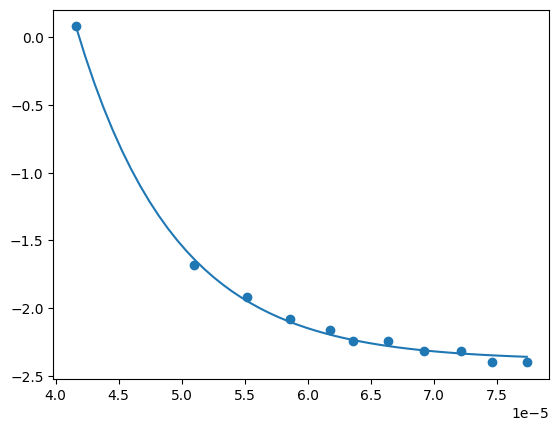

In [23]:
fig,ax = plt.subplots(1,1)
plt.scatter(t,V)
x = np.linspace(min(t),max(t))
y = model(x, m.values["V0"], m.values["tau"], m.values["t0"], m.values["q"])
plt.plot(x,y)
plt.show()

[ 0.00607115  0.59880277 -0.36940923 -0.26193844 -0.42358086  0.05342873
 -0.44844289  0.08975099 -0.16183734  0.53919616  0.42363728]


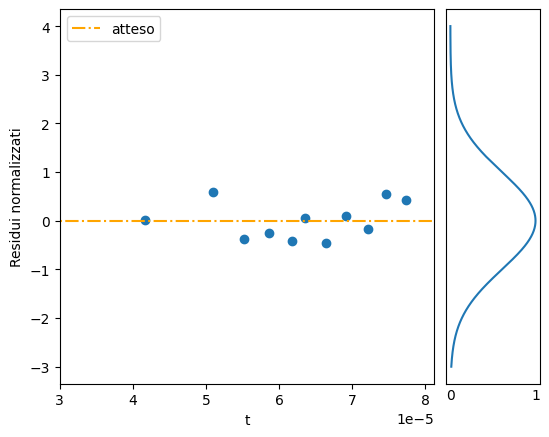

In [24]:
def mostra_residui(t, V, Verr, model, V0, tau, t0, q):
    residuals = (V - model(t,V0,tau,t0,q))/Verr

    fig = plt.figure(figsize=(6, 6))

    gs = fig.add_gridspec(2, 2,  width_ratios=(4, 1), height_ratios=(1, 4),
                        left=0.1, right=0.9, bottom=0.1, top=0.9,
                        wspace=0.05, hspace=0.05)

    ax = fig.add_subplot(gs[1, 0])
    ax_ploty = fig.add_subplot(gs[1, 1], sharey=ax)

    # weigthed mean of residuals

    ax.scatter(t, residuals)
    ax.hlines(0,0,len(V),color='orange',linestyle='-.',label='atteso')
    ax.set_xlabel("t")
    ax.set_xlim(3 * 10 ** (-5), max(t) * 1.05)
    ax.set_ylabel("Residui normalizzati")
    ax.legend(loc='upper left')
    ax.plot()

    x = np.linspace(-3, 4, 1000)
    ax_ploty.plot(np.exp(-0.5*(x)**2), x)
    ax_ploty.tick_params(labelleft=False, length=0)

    print(residuals)

mostra_residui(t, V, V_err, model, m.values["V0"], m.values["tau"], m.values["t0"], m.values["q"])

#### Studio tau

In [25]:
t = (tau1 - tau2) / np.sqrt(tau1_err ** 2 + tau2_err ** 2)
print(t)

0.08518626075642827


### RL v2

#### Carica

In [26]:
R = ufloat(32.7,0.3) #ohm

In [27]:
data = np.loadtxt("Dati/RL_carica_v2.txt")

t = []
V = []

for i in range(len(data)):
    t.append(data[i][0] * 10 ** (-3))
    V.append(data[i][1])

t = np.array(t)
V = np.array(V)

In [28]:
def model(t, V0, tau, t0, q): # t0 l'offset
    return V0 * np.exp(-(t + t0)/tau) + q

V_err = 0.01 * abs(V)

minimi_quadrati = LeastSquares(t, V, V_err, model)

m = Minuit(minimi_quadrati, V0 = 2, tau = 0.001, t0 = 0, q = 0)

m.fixed["V0"] = (2)
m.fixed["q"] = (0)
m.fixed = False
m.migrad()
m.hesse()
display(m)

tau2 = m.values["tau"]
tau2_err = m.errors["tau"]

def func(x):
    return chi2.cdf(x,m.ndof)

pvalue = func(np.inf) - func(m.fval)
print("p value: " + str(pvalue))

┌─────────────────────────────────────────────────────────────────────────┐
│                                Migrad                                   │
├──────────────────────────────────┬──────────────────────────────────────┤
│ FCN = 15.71 (χ²/ndof = 2.6)      │              Nfcn = 235              │
│ EDM = 1.06e-05 (Goal: 0.0002)    │                                      │
├──────────────────────────────────┼──────────────────────────────────────┤
│          Valid Minimum           │   Below EDM threshold (goal x 10)    │
├──────────────────────────────────┼──────────────────────────────────────┤
│      No parameters at limit      │           Below call limit           │
├──────────────────────────────────┼──────────────────────────────────────┤
│             Hesse ok             │         Covariance accurate          │
└──────────────────────────────────┴──────────────────────────────────────┘
┌───┬──────┬───────────┬───────────┬────────────┬────────────┬─────────┬─────────┬───────┐
│   │ Name │   Value   │ Hesse Err │ Minos Err- │ Minos Err+ │ Limit-  │ Limit+  │ Fixed │
├───┼──────┼───────────┼───────────┼────────────┼────────────┼─────────┼─────────┼───────┤
│ 0 │ V0   │    -46    │    33     │            │            │         │         │       │
│ 1 │ tau  │ 409.4e-6  │  2.9e-6   │            │            │         │         │       │
│ 2 │ t0   │ -3.53e-3  │  0.29e-3  │            │            │         │         │       │
│ 3 │ q    │  -6.6e-3  │  0.7e-3   │            │            │         │         │       │
└───┴──────┴───────────┴───────────┴────────────┴────────────┴─────────┴─────────┴───────┘
┌─────┬─────────────────────────────────────────────────┐
│     │          V0         tau          t0           q │
├─────┼─────────────────────────────────────────────────┤
│  V0 │    1.09e+03 2.276975e-6 -9.68953e-3    488.3e-6 │
│ tau │ 2.276975e-6    8.62e-12      19e-12    1.910e-9 │
│  t0 │ -9.68953e-3      19e-12    8.59e-08           0 │
│   q │    488.3e-6    1.910e-9           0     5.3e-07 │
└─────┴─────────────────────────────────────────────────┘

p value: 0.015411492862226428


In [29]:
print(m.values["tau"] * 33)

0.01351108467262405


#### Scarica

In [30]:
data = np.loadtxt("Dati/RL_scarica_v2.txt")

t = []
V = []

for i in range(len(data)):
    t.append(data[i][0] * 10 ** (-6))
    V.append(data[i][1])

t = np.array(t)
V = np.array(V)

In [31]:
def model(t, V0, tau, t0, q): # t0 l'offset
    return V0 * np.exp(-(t + t0)/tau) + q

V_err = 0.01 * V

minimi_quadrati = LeastSquares(t, V, V_err, model)

m = Minuit(minimi_quadrati, V0 = 2, tau = 0.001, t0 = 0, q = 0)

m.fixed["V0"] = (2)
m.fixed["q"] = (0)
m.fixed = False
m.migrad()
m.hesse()
display(m)

tau2 = m.values["tau"]
tau2_err = m.errors["tau"]

def func(x):
    return chi2.cdf(x,m.ndof)

pvalue = func(np.inf) - func(m.fval)
print("p value: " + str(pvalue))

┌─────────────────────────────────────────────────────────────────────────┐
│                                Migrad                                   │
├──────────────────────────────────┬──────────────────────────────────────┤
│ FCN = 2.38 (χ²/ndof = 0.3)       │              Nfcn = 225              │
│ EDM = 3.05e-05 (Goal: 0.0002)    │                                      │
├──────────────────────────────────┼──────────────────────────────────────┤
│          Valid Minimum           │   Below EDM threshold (goal x 10)    │
├──────────────────────────────────┼──────────────────────────────────────┤
│      No parameters at limit      │           Below call limit           │
├──────────────────────────────────┼──────────────────────────────────────┤
│             Hesse ok             │         Covariance accurate          │
└──────────────────────────────────┴──────────────────────────────────────┘
┌───┬──────┬───────────┬───────────┬────────────┬────────────┬─────────┬─────────┬───────┐
│   │ Name │   Value   │ Hesse Err │ Minos Err- │ Minos Err+ │ Limit-  │ Limit+  │ Fixed │
├───┼──────┼───────────┼───────────┼────────────┼────────────┼─────────┼─────────┼───────┤
│ 0 │ V0   │    1.7    │    2.2    │            │            │         │         │       │
│ 1 │ tau  │ 0.412e-3  │ 0.012e-3  │            │            │         │         │       │
│ 2 │ t0   │  0.1e-3   │  0.6e-3   │            │            │         │         │       │
│ 3 │ q    │   0.655   │   0.009   │            │            │         │         │       │
└───┴──────┴───────────┴───────────┴────────────┴────────────┴─────────┴─────────┴───────┘
┌─────┬─────────────────────────────────────────────┐
│     │         V0        tau         t0          q │
├─────┼─────────────────────────────────────────────┤
│  V0 │       4.99  505.39e-9 1.22970e-3   -0.33e-3 │
│ tau │  505.39e-9   1.41e-10    0.18e-9  -92.63e-9 │
│  t0 │ 1.22970e-3    0.18e-9   3.03e-07   -0.11e-6 │
│   q │   -0.33e-3  -92.63e-9   -0.11e-6   7.62e-05 │
└─────┴─────────────────────────────────────────────┘

p value: 0.9670999265286533


In [32]:
L = ufloat(tau2, tau2_err) * R

## Circuito RLC

Valore di R sotto il quale c'è sottosmorzamento e sopra il quale c'è sovrasmorzamento

$\omega _0 = \frac{1}{\sqrt {LC}}$

$\gamma = \frac{R}{2L}$

$\omega = \sqrt{\omega _0 ^ 2 - \gamma ^ 2}$

### Sottosmorzamento

In [33]:
R = 32.7 #ohm
C = 5 * 10 ** (-9) #farad
L = 14 * 10 ** (-3) #henry
V0 = 6 #volt

In [34]:
def model(t, q, t0, a, b, c, d):
    return a * np.exp(-b * (t-t0)) * np.cos(c * (t-t0) + d) + q

In [35]:
data = np.loadtxt("Dati/RLC_sotto.txt")

t = []
V = []

for i in range(len(data)):
    t.append(data[i][0] * 10 ** (-3))
    V.append(data[i][1] * 10 ** (-3))

t = np.array(t)
V = np.array(V)

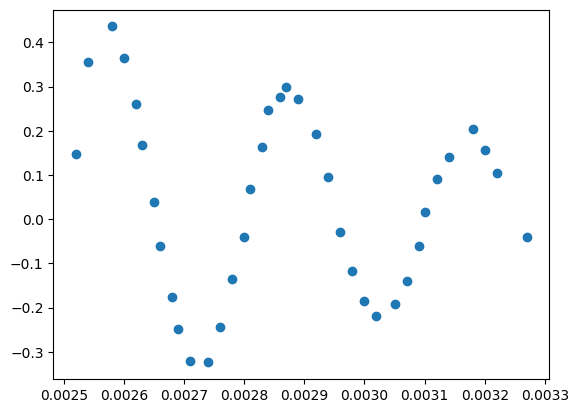

In [36]:
fig,ax = plt.subplots(1,1)
plt.scatter(t,V)
plt.show()

In [37]:
V_err = 0.05 * abs(V)

minimi_quadrati = LeastSquares(t, V, V_err, model)

m = Minuit(minimi_quadrati, q = 0, t0 = 0.0025, a = 0.4, b = 0, c = 12500, d = 0)
m.strategy = 2
m.migrad()
m.hesse()
display(m)

def func(x):
    return chi2.cdf(x,m.ndof)

pvalue = func(np.inf) - func(m.fval)
print("p value: " + str(pvalue))

┌─────────────────────────────────────────────────────────────────────────┐
│                                Migrad                                   │
├──────────────────────────────────┬──────────────────────────────────────┤
│ FCN = 630 (χ²/ndof = 20.3)       │              Nfcn = 927              │
│ EDM = 4.03e-07 (Goal: 0.0002)    │                                      │
├──────────────────────────────────┼──────────────────────────────────────┤
│          Valid Minimum           │   Below EDM threshold (goal x 10)    │
├──────────────────────────────────┼──────────────────────────────────────┤
│      No parameters at limit      │           Below call limit           │
├──────────────────────────────────┼──────────────────────────────────────┤
│             Hesse ok             │     Covariance FORCED pos. def.      │
└──────────────────────────────────┴──────────────────────────────────────┘
┌───┬──────┬───────────┬───────────┬────────────┬────────────┬─────────┬─────────┬───────┐
│   │ Name │   Value   │ Hesse Err │ Minos Err- │ Minos Err+ │ Limit-  │ Limit+  │ Fixed │
├───┼──────┼───────────┼───────────┼────────────┼────────────┼─────────┼─────────┼───────┤
│ 0 │ q    │  12.4e-3  │  0.6e-3   │            │            │         │         │       │
│ 1 │ t0   │ 2.6865e-3 │ 0.0014e-3 │            │            │         │         │       │
│ 2 │ a    │   0.376   │   0.004   │            │            │         │         │       │
│ 3 │ b    │  1.53e3   │  0.04e3   │            │            │         │         │       │
│ 4 │ c    │ 21.088e3  │  0.012e3  │            │            │         │         │       │
│ 5 │ d    │   2.257   │   0.029   │            │            │         │         │       │
└───┴──────┴───────────┴───────────┴────────────┴────────────┴─────────┴─────────┴───────┘
┌────┬─────────────────────────────────────────────────────────────────────────┐
│    │           q          t0           a           b           c           d │
├────┼─────────────────────────────────────────────────────────────────────────┤
│  q │    3.98e-07   -10.8e-12          -0  -6.7487e-3  -3.6862e-3      0.2e-6 │
│ t0 │   -10.8e-12    1.94e-12  -1.1111e-9 265.9410e-9 683.2973e-9  40.6753e-9 │
│  a │          -0  -1.1111e-9    1.74e-05   97.634e-3   -0.020e-3   -0.024e-3 │
│  b │  -6.7487e-3 265.9410e-9   97.634e-3    1.49e+03      0.10e3     -3.8e-3 │
│  c │  -3.6862e-3 683.2973e-9   -0.020e-3      0.10e3         156    -14.1e-3 │
│  d │      0.2e-6  40.6753e-9   -0.024e-3     -3.8e-3    -14.1e-3    0.000863 │
└────┴─────────────────────────────────────────────────────────────────────────┘

p value: 0.0


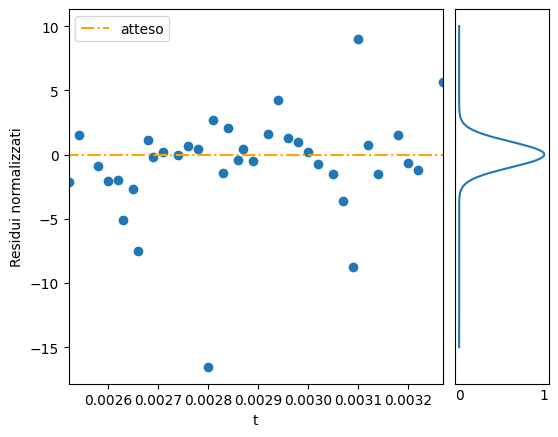

In [38]:
def mostra_residui(t, V, Verr, model, q, t0, a, b, c, d):
    residuals = (V - model(t,q,t0,a,b,c,d))/Verr

    indici = []
    for i in range(len(residuals)):
        if abs(residuals[i]) > 2: indici.append(i)

    fig = plt.figure(figsize=(6, 6))

    gs = fig.add_gridspec(2, 2,  width_ratios=(4, 1), height_ratios=(1, 4),
                        left=0.1, right=0.9, bottom=0.1, top=0.9,
                        wspace=0.05, hspace=0.05)

    ax = fig.add_subplot(gs[1, 0])
    ax_ploty = fig.add_subplot(gs[1, 1], sharey=ax)

    # weigthed mean of residuals

    ax.scatter(t, residuals)
    ax.hlines(0,0,len(V),color='orange',linestyle='-.',label='atteso')
    ax.set_xlabel("t")
    ax.set_xlim(min(t), max(t))
    ax.set_ylabel("Residui normalizzati")
    ax.legend(loc='upper left')
    ax.plot()

    x = np.linspace(-15, 10, 1000)
    ax_ploty.plot(np.exp(-0.5*(x)**2), x)
    ax_ploty.tick_params(labelleft=False, length=0)

    return indici

da_rimuovere = mostra_residui(t, V, V_err, model, m.values["q"], m.values["t0"], m.values["a"], m.values["b"], m.values["c"], m.values["d"])

In [39]:
t = np.delete(t, da_rimuovere)
V = np.delete(V, da_rimuovere)
V_err = np.delete(V_err, da_rimuovere)

In [40]:
qi = m.values["q"]
t0i = m.values["t0"]
ai = m.values["a"]
bi = m.values["b"]
ci = m.values["c"]
di = m.values["d"]

In [41]:
minimi_quadrati = LeastSquares(t, V, V_err, model)

m = Minuit(minimi_quadrati, q = qi, t0 = t0i, a = ai, b = bi, c = ci, d = di)
m.strategy = 2
m.migrad()
m.hesse()
display(m)

def func(x):
    return chi2.cdf(x,m.ndof)

pvalue = func(np.inf) - func(m.fval)
print("p value: " + str(pvalue))

┌─────────────────────────────────────────────────────────────────────────┐
│                                Migrad                                   │
├──────────────────────────────────┬──────────────────────────────────────┤
│ FCN = 23.41 (χ²/ndof = 1.3)      │              Nfcn = 171              │
│ EDM = 1.55e-06 (Goal: 0.0002)    │                                      │
├──────────────────────────────────┼──────────────────────────────────────┤
│          Valid Minimum           │   Below EDM threshold (goal x 10)    │
├──────────────────────────────────┼──────────────────────────────────────┤
│      No parameters at limit      │           Below call limit           │
├──────────────────────────────────┼──────────────────────────────────────┤
│             Hesse ok             │     Covariance FORCED pos. def.      │
└──────────────────────────────────┴──────────────────────────────────────┘
┌───┬──────┬───────────┬───────────┬────────────┬────────────┬─────────┬─────────┬───────┐
│   │ Name │   Value   │ Hesse Err │ Minos Err- │ Minos Err+ │ Limit-  │ Limit+  │ Fixed │
├───┼──────┼───────────┼───────────┼────────────┼────────────┼─────────┼─────────┼───────┤
│ 0 │ q    │  0.0120   │  0.0016   │            │            │         │         │       │
│ 1 │ t0   │ 2.6864e-3 │ 0.0028e-3 │            │            │         │         │       │
│ 2 │ a    │   0.369   │   0.006   │            │            │         │         │       │
│ 3 │ b    │  1.49e3   │  0.05e3   │            │            │         │         │       │
│ 4 │ c    │  21.05e3  │  0.05e3   │            │            │         │         │       │
│ 5 │ d    │   2.26    │   0.06    │            │            │         │         │       │
└───┴──────┴───────────┴───────────┴────────────┴────────────┴─────────┴─────────┴───────┘
┌────┬───────────────────────────────────────────────────────────────────────────────┐
│    │            q           t0            a            b            c            d │
├────┼───────────────────────────────────────────────────────────────────────────────┤
│  q │     2.51e-06      -98e-12       1.3e-6   21.5050e-3   14.9196e-3       2.1e-6 │
│ t0 │      -98e-12      7.7e-12    -4.029e-9   -13.064e-9 12.879085e-6   157.822e-9 │
│  a │       1.3e-6    -4.029e-9     3.22e-05   210.191e-3    17.969e-3    -0.090e-3 │
│  b │   21.5050e-3   -13.064e-9   210.191e-3     3.01e+03        0.3e3       0.0118 │
│  c │   14.9196e-3 12.879085e-6    17.969e-3        0.3e3      2.3e+03      -0.2634 │
│  d │       2.1e-6   157.822e-9    -0.090e-3       0.0118      -0.2634      0.00341 │
└────┴───────────────────────────────────────────────────────────────────────────────┘

p value: 0.17515786862598637


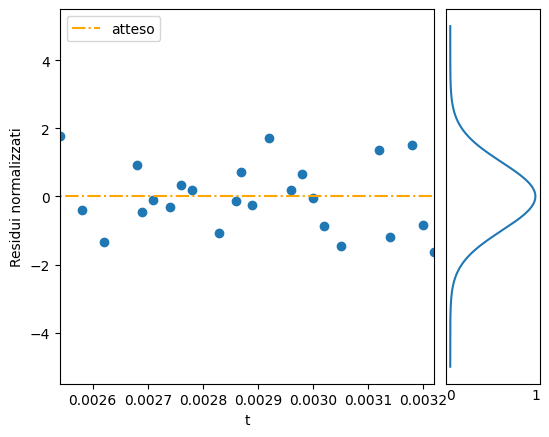

In [42]:
def mostra_residui(t, V, Verr, model, q, t0, a, b, c, d):
    residuals = (V - model(t,q,t0,a,b,c,d))/Verr

    fig = plt.figure(figsize=(6, 6))

    gs = fig.add_gridspec(2, 2,  width_ratios=(4, 1), height_ratios=(1, 4),
                        left=0.1, right=0.9, bottom=0.1, top=0.9,
                        wspace=0.05, hspace=0.05)

    ax = fig.add_subplot(gs[1, 0])
    ax_ploty = fig.add_subplot(gs[1, 1], sharey=ax)

    # weigthed mean of residuals

    ax.scatter(t, residuals)
    ax.hlines(0,0,len(V),color='orange',linestyle='-.',label='atteso')
    ax.set_xlabel("t")
    ax.set_xlim(min(t), max(t))
    ax.set_ylabel("Residui normalizzati")
    ax.legend(loc='upper left')
    ax.plot()

    x = np.linspace(-5, 5, 1000)
    ax_ploty.plot(np.exp(-0.5*(x)**2), x)
    ax_ploty.tick_params(labelleft=False, length=0)

mostra_residui(t, V, V_err, model, m.values["q"], m.values["t0"], m.values["a"], m.values["b"], m.values["c"], m.values["d"])

#### Sovrasmorzato

In [43]:
R = 10000 #ohm (1%)
C = 5 * 10 ** (-9) #farad
L = 14 * 10 ** (-3) #henry
V0 = 6 #volt

In [44]:
data = np.loadtxt("Dati/RLC_sovra.txt")

t = []
V = []

for i in range(len(data)):
    t.append(data[i][0] * 10 ** (-9))
    V.append(data[i][1])

t = np.array(t)
V = np.array(V)

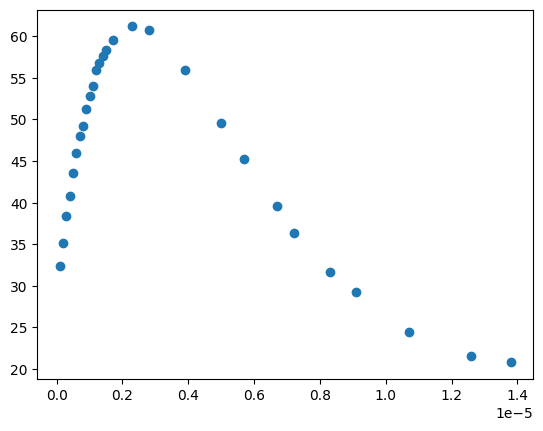

In [45]:
fig,ax = plt.subplots(1,1)
plt.scatter(t,V)
plt.show()

In [46]:
'''def model(t, q, t0, a, b, c, d):
    return a * np.exp(- b * (t-t0)) + c * np.exp(- d * (t-t0)) + q'''

def model(t, q, t0, a, b, c):
    return (a + b * t) * np.exp( - c * (t-t0)) + q

In [47]:
V_err = 0.01 * abs(V)

minimi_quadrati = LeastSquares(t, V, V_err, model)

m = Minuit(minimi_quadrati, q = 17.5, t0 = 20 * 10 ** (-6), a = 6.5 * 10 ** (-3), b = 24500, c = 385000)

m.strategy = 2
m.migrad()
m.hesse()

display(m)

def func(x):
    return chi2.cdf(x,m.ndof)

pvalue = func(np.inf) - func(m.fval)
print("p value: " + str(pvalue))

┌─────────────────────────────────────────────────────────────────────────┐
│                                Migrad                                   │
├──────────────────────────────────┬──────────────────────────────────────┤
│ FCN = 17.49 (χ²/ndof = 0.8)      │              Nfcn = 351              │
│ EDM = 1.95e-05 (Goal: 0.0002)    │                                      │
├──────────────────────────────────┼──────────────────────────────────────┤
│          Valid Minimum           │   Below EDM threshold (goal x 10)    │
├──────────────────────────────────┼──────────────────────────────────────┤
│      No parameters at limit      │           Below call limit           │
├──────────────────────────────────┼──────────────────────────────────────┤
│             Hesse ok             │     Covariance FORCED pos. def.      │
└──────────────────────────────────┴──────────────────────────────────────┘
┌───┬──────┬───────────┬───────────┬────────────┬────────────┬─────────┬─────────┬───────┐
│   │ Name │   Value   │ Hesse Err │ Minos Err- │ Minos Err+ │ Limit-  │ Limit+  │ Fixed │
├───┼──────┼───────────┼───────────┼────────────┼────────────┼─────────┼─────────┼───────┤
│ 0 │ q    │   17.58   │   0.17    │            │            │         │         │       │
│ 1 │ t0   │ 18.69e-6  │  0.10e-6  │            │            │         │         │       │
│ 2 │ a    │  8.1e-3   │  0.5e-3   │            │            │         │         │       │
│ 3 │ b    │  30.5e3   │   1.2e3   │            │            │         │         │       │
│ 4 │ c    │  385.7e3  │   1.9e3   │            │            │         │         │       │
└───┴──────┴───────────┴───────────┴────────────┴────────────┴─────────┴─────────┴───────┘
┌────┬──────────────────────────────────────────────────────────────────────────────────────┐
│    │                q               t0                a                b                c │
├────┼──────────────────────────────────────────────────────────────────────────────────────┤
│  q │           0.0281      -4.43937e-9        -38.50e-6          -64.698          204.449 │
│ t0 │      -4.43937e-9         1.05e-14      -17.701e-12 -89.656160680e-6 -65.792113684e-6 │
│  a │        -38.50e-6      -17.701e-12         2.13e-07     486.27756e-3    -596.38992e-3 │
│  b │          -64.698 -89.656160680e-6     486.27756e-3         1.55e+06           -1.0e6 │
│  c │          204.449 -65.792113684e-6    -596.38992e-3           -1.0e6         3.53e+06 │
└────┴──────────────────────────────────────────────────────────────────────────────────────┘

p value: 0.7847140701890024


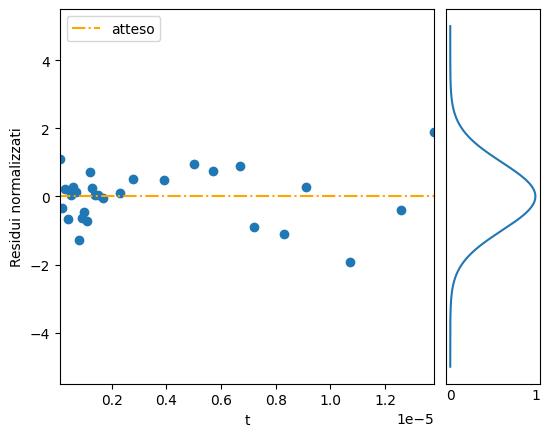

In [48]:
def mostra_residui(t, V, Verr, model, q, t0, a, b, c):
    residuals = (V - model(t,q,t0,a,b,c))/Verr

    fig = plt.figure(figsize=(6, 6))

    gs = fig.add_gridspec(2, 2,  width_ratios=(4, 1), height_ratios=(1, 4),
                        left=0.1, right=0.9, bottom=0.1, top=0.9,
                        wspace=0.05, hspace=0.05)

    ax = fig.add_subplot(gs[1, 0])
    ax_ploty = fig.add_subplot(gs[1, 1], sharey=ax)

    # weigthed mean of residuals

    ax.scatter(t, residuals)
    ax.hlines(0,0,len(V),color='orange',linestyle='-.',label='atteso')
    ax.set_xlabel("t")
    ax.set_xlim(min(t), max(t))
    ax.set_ylabel("Residui normalizzati")
    ax.legend(loc='upper left')
    ax.plot()

    x = np.linspace(-5, 5, 1000)
    ax_ploty.plot(np.exp(-0.5*(x)**2), x)
    ax_ploty.tick_params(labelleft=False, length=0)

mostra_residui(t, V, V_err, model, m.values["q"], m.values["t0"], m.values["a"], m.values["b"], m.values["c"])